<a href="https://colab.research.google.com/github/Digvijayapatro/Classification_machine_learning/blob/main/classification_naive_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [121]:
# importing data set
Data=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
Data.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
# finding the missing values 
print("#Age missing entries =",Data.Age.isnull().sum())
print("#survived missing entries =",Data.Survived.isnull().sum())
print("#Pclass missing entries =",Data.Pclass.isnull().sum())
print("#SibSp missing entries =",Data.SibSp.isnull().sum())
print("#Parch missing entries =",Data.Parch.isnull().sum())
print("#Fare missing entries =",Data.Fare.isnull().sum())
print("#Cabin missing entries =",Data.Cabin.isnull().sum())
print("#Embarked missing entries =",Data.Embarked.isnull().sum())

#Age missing entries = 177
#survived missing entries = 0
#Pclass missing entries = 0
#SibSp missing entries = 0
#Parch missing entries = 0
#Fare missing entries = 0
#Cabin missing entries = 687
#Embarked missing entries = 2


In [123]:
# Remove unnecessary columns
Data = Data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [124]:
# Fill missing values
Data['Age'] = Data['Age'].fillna(Data['Age'].median())
Data['Embarked'] = Data['Embarked'].fillna(Data['Embarked'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [125]:
# Convert categorical variables to numerical
Data['Sex'] = Data['Sex'].map({'female': 0, 'male': 1}).astype(int)
Data['Embarked'] = Data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}).astype(int)
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

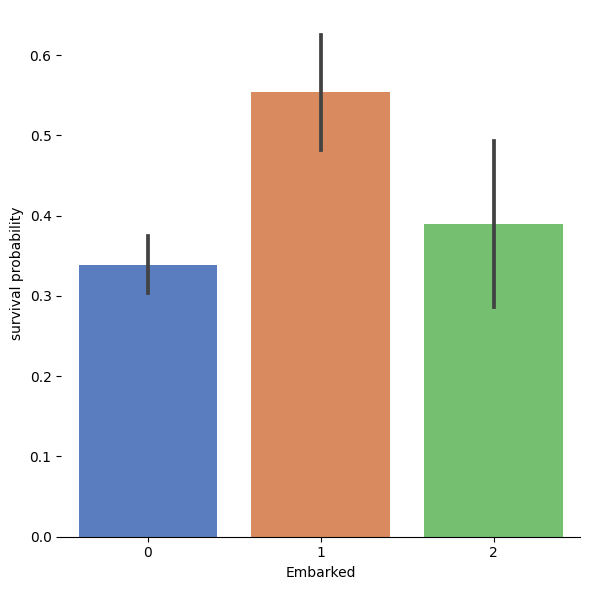

In [126]:
# graph plot
g = sns.catplot(x="Embarked", y="Survived",  data=Data,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [127]:
Data=Data.fillna({'Embarked':'C'})

In [128]:
print("#Embarked missing entries =",Data.Embarked.isnull().sum())

#Embarked missing entries = 0


In [129]:
Data=Data.fillna({"Cabin":'X'})
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


<Axes: >

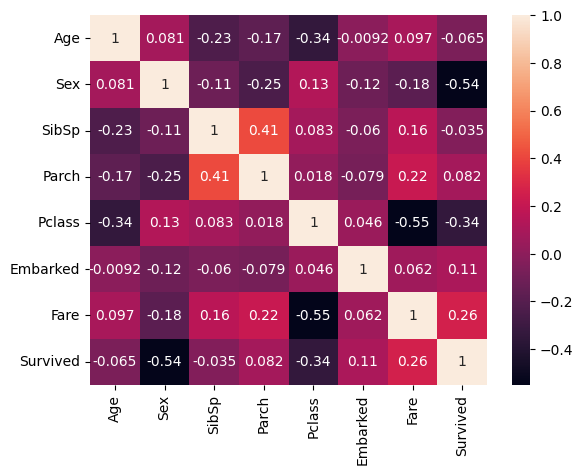

In [130]:
sns.heatmap(Data[["Age","Sex","SibSp","Parch","Pclass","Embarked","Fare","Survived"]].corr(),annot=True)

In [131]:
# central tendency
age_means=np.zeros((3,9))
median=Data.Age.mean()
for classNum in range (0,Data.Pclass.max()):  # 0 --> 1st class
    for sibNum in range (0,Data.SibSp.max()+1): # adding one to take the range [0,8] not [0,8[.
        age_means[classNum][sibNum]=Data["Age"][(Data["Pclass"]==(classNum+1)) & (Data["SibSp"]==sibNum)].mean()
        if np.isnan(age_means[classNum][sibNum]):
            age_means[classNum][sibNum]=median
print(age_means)

[[37.22262774 36.61859155 37.2        22.         29.36158249 29.36158249
  29.36158249 29.36158249 29.36158249]
 [31.57358333 27.36363636 19.125      30.         29.36158249 29.36158249
  29.36158249 29.36158249 29.36158249]
 [27.73766382 25.65662651 20.7        15.25        7.05555556 10.2
  29.36158249 29.36158249 28.        ]]


In [132]:
Null_indx=list(Data["Age"][Data["Age"].isnull()].index)
for i in Null_indx:
    Data["Age"].iloc[i]=age_means[Data.Pclass[i] - 1][Data.SibSp[i]]
    
print("#Age missing entries =",Data.Age.isnull().sum())

#Age missing entries = 0


In [133]:
# implementing the naive bayes algorithm
def naive_bayes(x_train, y_train, x_test):
    num_samples, num_features = x_train.shape
    num_classes = len(np.unique(y_train))
    
    # Calculate class probabilities
    class_probabilities = {}
    for class_label in np.unique(y_train):
        class_probabilities[class_label] = np.sum(y_train == class_label) / num_samples
    
    # Calculate feature probabilities
    feature_probabilities = {}
    for feature in range(num_features):
        feature_probabilities[feature] = {}
        for class_label in np.unique(y_train):
            feature_values = x_train[y_train == class_label, feature]
            feature_probabilities[feature][class_label] = {
                'mean': np.mean(feature_values),
                'std': np.std(feature_values)
            }
    
    # Predict the class labels for test samples
    y_pred = []
    for sample in x_test:
        posterior_probabilities = {}
        for class_label in np.unique(y_train):
            posterior_probabilities[class_label] = class_probabilities[class_label]
            for feature in range(num_features):
                mean = feature_probabilities[feature][class_label]['mean']
                std = feature_probabilities[feature][class_label]['std']
                likelihood = (1 / (np.sqrt(2 * np.pi) * std)) * \
                             np.exp(-((sample[feature] - mean) ** 2) / (2 * std ** 2))
                posterior_probabilities[class_label] *= likelihood
        predicted_class = max(posterior_probabilities, key=posterior_probabilities.get)
        y_pred.append(predicted_class)
    
    return y_pred

**Preprocess data**

In [134]:
# Split features and target
X_train = Data.drop('Survived', axis=1).values
y_train = Data['Survived'].values

In [135]:
# Run Naive Bayes algorithm
y_pred = naive_bayes(X_train, y_train, X_train)

In [136]:
# Calculate accuracy
accuracy = np.mean(y_pred == y_train)
print("Accuracy:", accuracy)

Accuracy: 0.792368125701459


In [137]:
# Generate submission file
submission = pd.DataFrame({
    'Sex': Data['Sex'],
    'Survived': y_pred
})
submission.to_csv('NaiveBayessubmission.csv', index=False)
print("Submission file generated.")

Submission file generated.


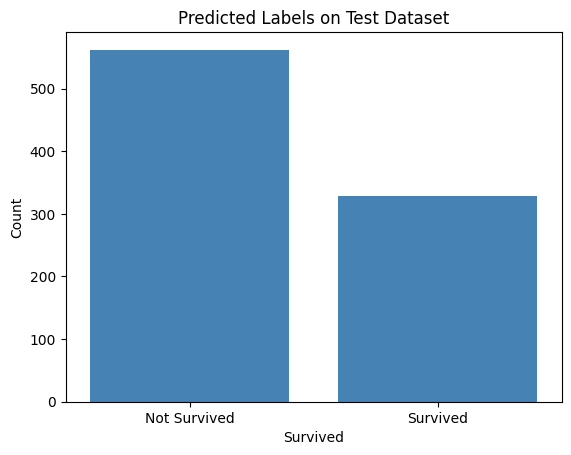

In [138]:
# Count occurrences of predicted labels in the test dataset
predicted_test_counts = np.bincount(y_pred)

# x-axis positions for the bars
x_test = np.arange(len(predicted_test_counts))

# Bar plot for predicted labels on the test dataset
plt.bar(x_test, predicted_test_counts, color='steelblue')

# Add labels and title
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Predicted Labels on Test Dataset")

# Adjust x-axis limits and tick labels
plt.xlim(-0.5, len(x_test) - 0.5)
plt.xticks(x_test, labels=['Not Survived', 'Survived'])

# Display the plot
plt.show()
